In [1]:
from proj1_helpers import *
from implementations import *
from costs import *
from helper import *
from plots import *
from notebook_helper import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = 'data/'
PREDICTION_PATH = 'predictions/'

In [3]:
y_tr, x_tr, ids_tr = load_csv_data(DATA_PATH + "train.csv")
y_te, x_te, ids_te = load_csv_data(DATA_PATH + "test.csv")

In [4]:
x_tr_0, y_tr_0, x_tr_1, y_tr_1, x_tr_2, y_tr_2, x_tr_3, y_tr_3, x_te_0, x_te_1, x_te_2, x_te_3, jet_num_te = preprocess_datasets(x_tr, y_tr, x_te, y_te)

In [5]:
def apply_least_squares(x, y, degree):
    degrees = np.arange(degree) + 1
    losses = []
    weights = []
    poly = np.ones((x.shape[0], 1))

    for degree in degrees:
        poly = fast_build_poly(x, poly, degree)
        w, loss = least_squares(y, poly)
        weights.append(w)
        losses.append(compute_categorical_loss(y, poly, w)) 
    
    plt.plot(degrees, losses, 'r') 
    plt.xlabel('Degree')
    plt.ylabel('Error')
    plt.show()
    print('Min =', min(losses))
    print('Best degree =', losses.index(min(losses)) + 1)
    
    return weights, losses

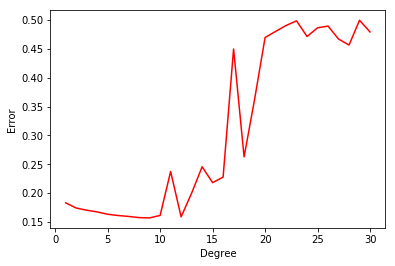

Min = 0.1569265260776876
Best degree = 9


In [6]:
w_0, losses_0 = apply_least_squares(x_tr_0, y_tr_0, 30)

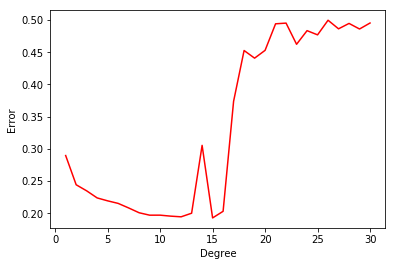

Min = 0.19276797689053957
Best degree = 15


In [7]:
w_1, losses_1 = apply_least_squares(x_tr_1, y_tr_1, 30)

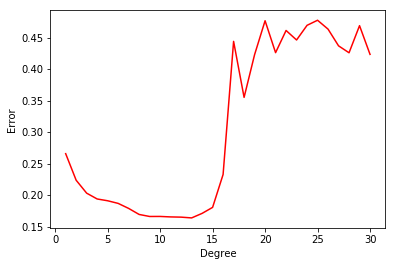

Min = 0.1638182576073364
Best degree = 13


In [8]:
w_2, losses_2 = apply_least_squares(x_tr_2, y_tr_2, 30)

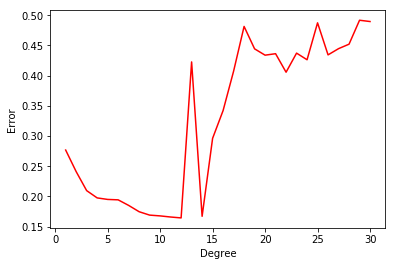

Min = 0.16454611081032305
Best degree = 12


In [9]:
w_3, losses_3 = apply_least_squares(x_tr_3, y_tr_3, 30)

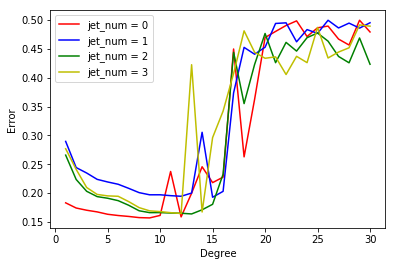

In [13]:
degrees = np.arange(30) + 1
plt.plot(degrees, losses_0, 'r', label='jet_num = 0') 
plt.plot(degrees, losses_1, 'b', label='jet_num = 1') 
plt.plot(degrees, losses_2, 'g', label='jet_num = 2') 
plt.plot(degrees, losses_3, 'y', label='jet_num = 3') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(loc=2)
plt.show()


In [57]:
w_0, _ = least_squares(y_tr_0, build_poly(x_tr_0, 9))
w_1, _ = least_squares(y_tr_1, build_poly(x_tr_1, 15))
w_2, _ = least_squares(y_tr_2, build_poly(x_tr_2, 13))
w_3, _ = least_squares(y_tr_3, build_poly(x_tr_3, 12))

In [60]:
y_te_0 = predict_labels(w_0, build_poly(x_te_0, 9))
y_te_1 = predict_labels(w_1, build_poly(x_te_1, 15))
y_te_2 = predict_labels(w_2, build_poly(x_te_2, 13))
y_te_3 = predict_labels(w_3, build_poly(x_te_3, 12))

In [80]:
predicted_y_te = []
i_0, i_1, i_2, i_3 = 0, 0, 0, 0
for jet_num in jet_num_te:
    if jet_num == 0:
        predicted_y_te.append(y_te_0[i_0])
        i_0 += 1
    elif jet_num == 1:
        predicted_y_te.append(y_te_1[i_1])
        i_1 += 1
    elif jet_num == 2:
        predicted_y_te.append(y_te_2[i_2])
        i_2 += 1
    else:
        predicted_y_te.append(y_te_3[i_3])
        i_3 += 1

In [83]:
create_csv_submission(ids_te, predicted_y_te, PREDICTION_PATH + "output.csv")

In [14]:
k_fold = 4
degrees = np.arange(30) + 1
k_indices = build_k_indices(y_tr_0, k_fold)
losses_tr_0 = []
losses_te_0 = []
for i, degree in enumerate(degrees):
    loss_tr, loss_te = cross_validation(y_tr_0, x_tr_0, k_indices, k_fold, degree)
    losses_tr_0.append(loss_tr)
    losses_te_0.append(loss_te)

In [15]:
k_fold = 4
degrees = np.arange(30) + 1
k_indices = build_k_indices(y_tr_1, k_fold)
losses_tr_1 = []
losses_te_1 = []
for i, degree in enumerate(degrees):
    loss_tr, loss_te = cross_validation(y_tr_1, x_tr_1, k_indices, k_fold, degree)
    losses_tr_1.append(loss_tr)
    losses_te_1.append(loss_te)

In [16]:
k_fold = 4
degrees = np.arange(30) + 1
k_indices = build_k_indices(y_tr_2, k_fold)
losses_tr_2 = []
losses_te_2 = []
for i, degree in enumerate(degrees):
    loss_tr, loss_te = cross_validation(y_tr_2, x_tr_2, k_indices, k_fold, degree)
    losses_tr_2.append(loss_tr)
    losses_te_2.append(loss_te)

In [17]:
k_fold = 4
degrees = np.arange(30) + 1
k_indices = build_k_indices(y_tr_3, k_fold)
losses_tr_3 = []
losses_te_3 = []
for i, degree in enumerate(degrees):
    loss_tr, loss_te = cross_validation(y_tr_3, x_tr_3, k_indices, k_fold, degree)
    losses_tr_3.append(loss_tr)
    losses_te_3.append(loss_te)

In [18]:
plt.plot(degrees, losses_tr_0, marker=".", color='b', label='Train error (jet_num = 0)')
plt.plot(degrees, losses_te_0, marker=".", color='r', label='Test error (jet_num = 0)')
plt.plot(degrees, losses_tr_1, marker=".", color='Y', label='Train error (jet_num = 1))
plt.plot(degrees, losses_te_1, marker=".", color='g', label='Test error (jet_num = 1)')
plt.xlabel("Degree")
plt.ylabel("Error")
plt.title("{k}-fold cross validation".format(k=k_fold))
plt.legend(loc=2)
plt.grid(True)

SyntaxError: EOL while scanning string literal (<ipython-input-18-b66bbc54fb64>, line 3)

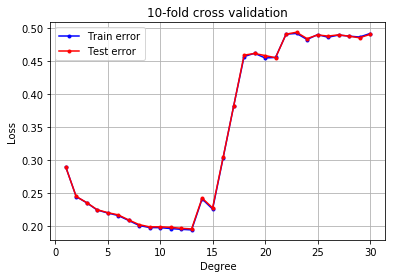

In [119]:
cross_validation_visualization(k_fold, degrees, losses_tr, losses_te)

In [124]:
seeds = range(10)
num_data = 10000
ratio_train = 0.005
degrees = range(1, 20)

loss_tr = np.empty((len(seeds), len(degrees)))
loss_te = np.empty((len(seeds), len(degrees)))
    
for index_seed, seed in enumerate(seeds):
    np.random.seed(seed)
    x_tr, x_te, y_tr, y_te = split_data(x_tr_0, y_tr_0, ratio_train, seed)
        
    for index_degree, degree in enumerate(degrees):
        tx_tr = build_poly(x_tr, degree)
        tx_te = build_poly(x_te, degree)
        w, loss = least_squares(y_tr, tx_tr)
        loss_tr[index_seed, index_degree] = loss
        loss_te[index_seed, index_degree] = compute_categorical_loss(y_te, tx_te, w)

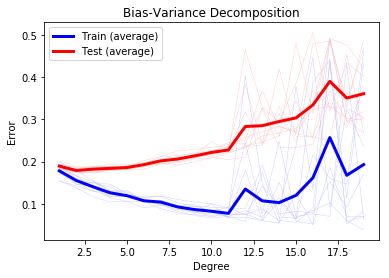

In [126]:
bias_variance_decomposition_visualization(degrees, loss_tr, loss_te)